

Hello Data People i have tried to keep the Kernel as informative as possible ,if you like it leave a upvote ,it really motivates.



# **TMDB-box-office-Data Analysis & Prediction Model**


The primary goal of the kaggle project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This data set contains informatio movies collected from The Movie Database (TMDb), including user ratings and revenue.

**Project Overview**

In this project, you will analyze a dataset and then communicate your findings about it. You will use the Python libraries NumPy, pandas, and Matplotlib to make your analysis easier.

**Data Source**

The Data have been taken from Kaggle ,the kingdom of Data people.

What we will be doing though this Model Building.

   1. We will first analyse the Data and try to understand the Features/variables.
   2.  We will then Visualize the Data for better understanding.
   3. We will then use the Machine Learning methods to Train and predict.
   4. At last we will define at what accuracy we can classify correctly.

**Importing The Library And Data**

Now we will import the libraries each one has a specific role to play.

**Pandas**: pandas is a library written for the Python programming language for data manipulation and analysis.

**Numpy**: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

**Seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Matplotlib**: Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:


#main_train=pd.read_csv('https:/kaggle/input/tmdb-box-office-prediction/train.csv')
#main_test=pd.read_csv('https:/kaggle/input/tmdb-box-office-prediction/test.csv')



In [30]:
traindf=pd.read_csv('train123.csv')

In [31]:

testdf = pd.read_csv("test123.csv")
print(traindf.shape)
print(testdf.shape)
traindf.head(2)

(3000, 23)
(4398, 22)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [32]:
print(traindf.isnull().sum())
print('\n\n\n data',testdf.isnull().sum())

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64



 data id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity        

In [33]:
print("Train Data",traindf.info())
print("\n\n\n\n")

print("Test Data",testdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [34]:
traindf.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0040746,en,Deadfall,"Alexander, a journalist, philosopher and retir...",NaN,...,9/10/15,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The One and Only,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe44479251416c7502f229', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [35]:
testdf.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [39]:
traindf.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [40]:
BinsBudget=np.linspace(min(traindf.budget),max(traindf.budget),4)
BinsRun=np.linspace(min(traindf.runtime),max(traindf.runtime),4)
BinsBudgetName=["Low Budget","medium Budget","High Budget"]
BinRunName=["Short","Medium","Long"]
traindf["BinBudget"]=pd.cut(traindf["budget"],BinsBudget,labels=BinsBudgetName,include_lowest=True)
traindf["BinRunTime"]=pd.cut(traindf["runtime"],BinsRun,labels=BinRunName,include_lowest=True)



In [41]:
traindf.sort_values("budget").head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,BinBudget,BinRunTime
895,896,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 12, 'n...",NaN,tt0077629,en,Gray Lady Down,"The USS Neptune, a nuclear submarine, is sunk ...",3.507084,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Trapped underwater... with time running out.,Gray Lady Down,"[{'id': 339, 'name': 'submarine'}, {'id': 793,...","[{'cast_id': 1, 'character': 'Captain Paul Bla...","[{'credit_id': '564e776d9251414af70014c5', 'de...",5438927,Low Budget,Short


In [42]:
traindf.runtime

0        93.0
1       113.0
2       105.0
3       122.0
4       118.0
        ...  
2995    102.0
2996    102.0
2997    120.0
2998     90.0
2999    106.0
Name: runtime, Length: 3000, dtype: float64

C:\Users\ps2en\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


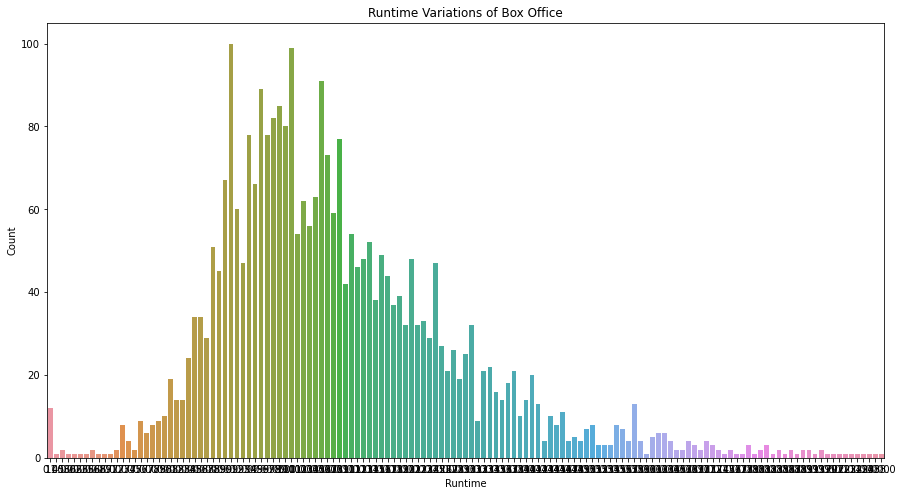

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(traindf.runtime)
plt.xlabel("Runtime")
plt.ylabel("Count")
plt.title("Runtime Variations of Box Office")
plt.show()

C:\Users\ps2en\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


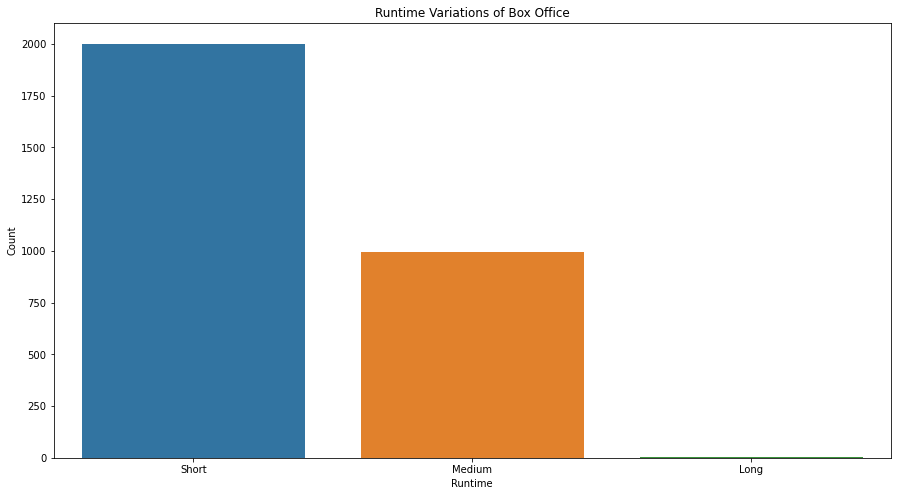

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(traindf["BinRunTime"].sort_values())
plt.xlabel("Runtime")
plt.ylabel("Count")
plt.title("Runtime Variations of Box Office")
plt.show()

Text(0.5, 1.0, 'RunTime Variations of Box Office')

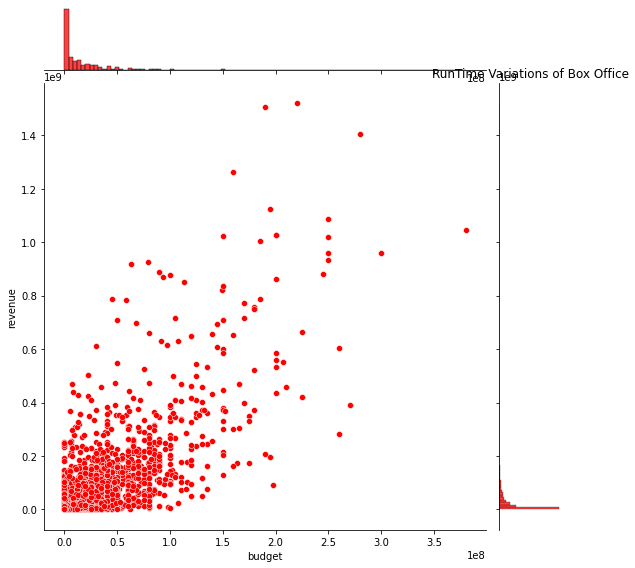

In [45]:
sns.jointplot(x="budget", y="revenue", data=traindf, height=8, ratio=6, color="r")
plt.xlabel("RunTime")
plt.ylabel("Count")
plt.title("RunTime Variations of Box Office")

Text(0.5, 1.0, 'Budget Variations of Box Office')

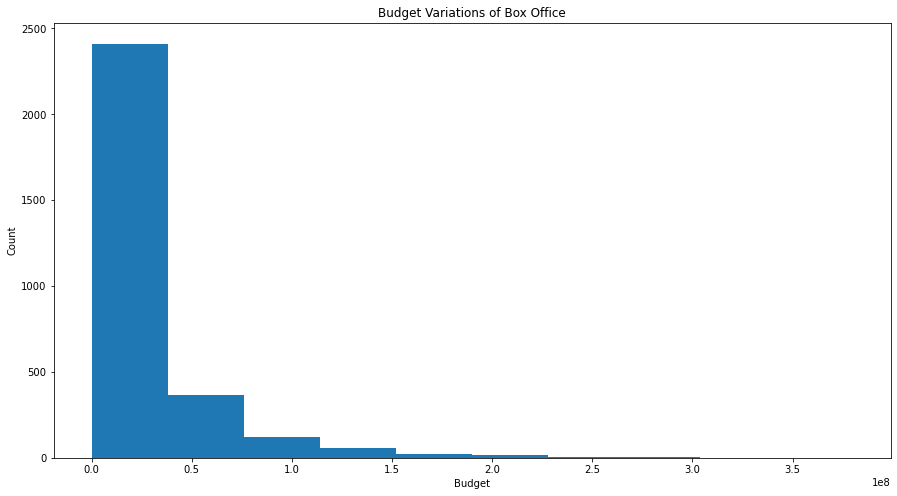

In [46]:
plt.figure(figsize = (15,8))
plt.hist(traindf["budget"])
plt.xlabel("Budget")
plt.ylabel("Count")
plt.title("Budget Variations of Box Office")

Text(0.5, 1.0, 'Budget Variations of Box Office')

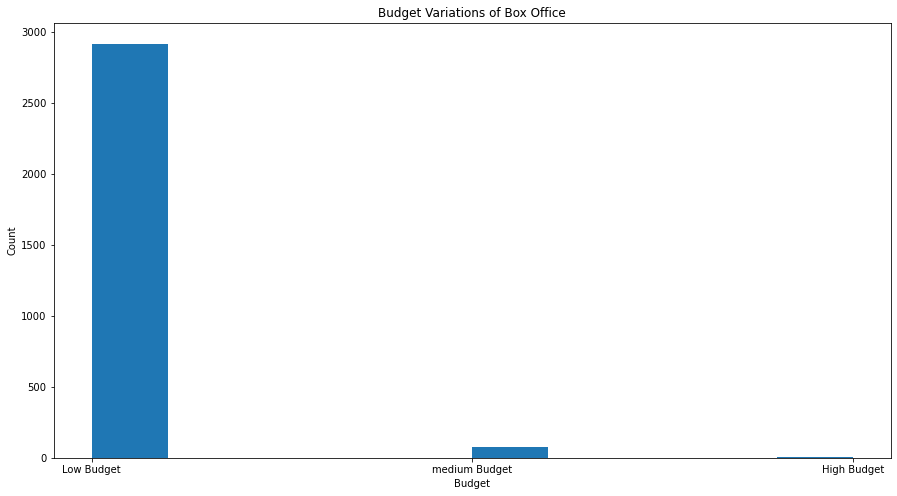

In [47]:
plt.figure(figsize = (15,8))
plt.hist(traindf["BinBudget"])
plt.xlabel("Budget")
plt.ylabel("Count")
plt.title("Budget Variations of Box Office")

Text(0.5, 1.0, 'Budget Variations of Box Office')

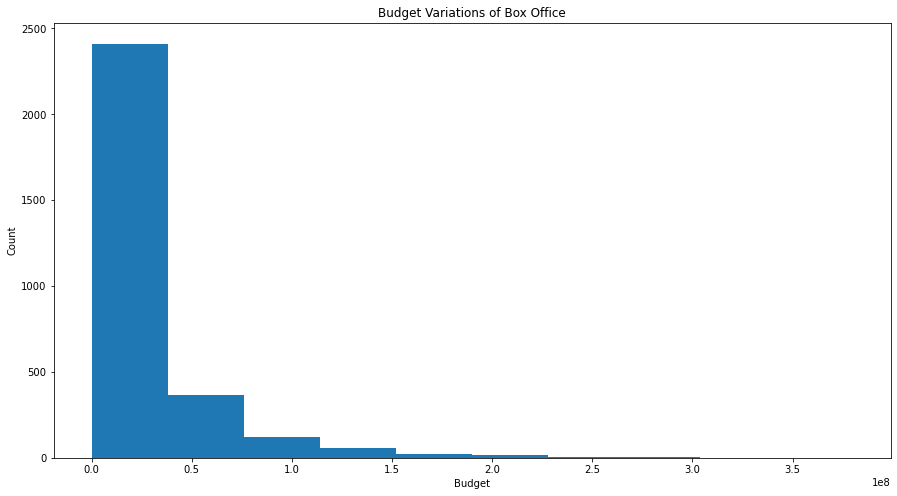

In [48]:
plt.figure(figsize = (15,8))
plt.hist(traindf["budget"])
plt.xlabel("Budget")
plt.ylabel("Count")
plt.title("Budget Variations of Box Office")

Text(0.5, 1.0, 'Budget Variations of Box Office')

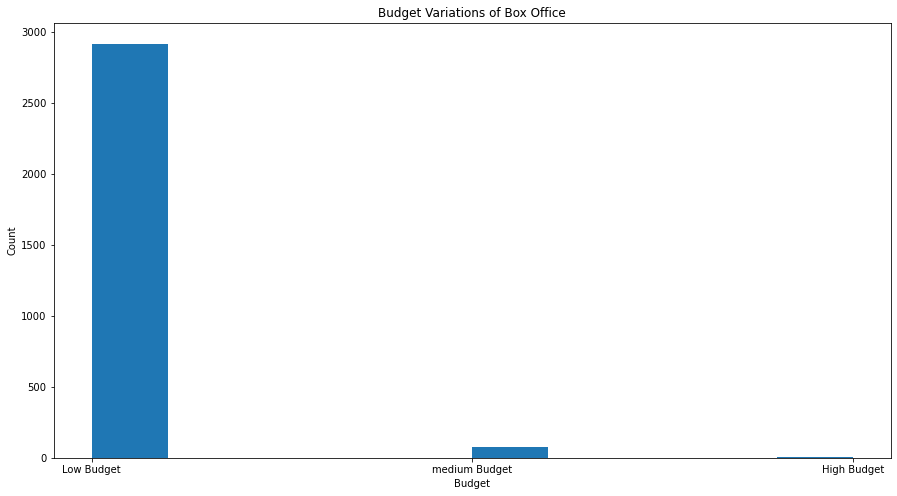

In [49]:
plt.figure(figsize = (15,8))
plt.hist(traindf["BinBudget"])
plt.xlabel("Budget")
plt.ylabel("Count")
plt.title("Budget Variations of Box Office")

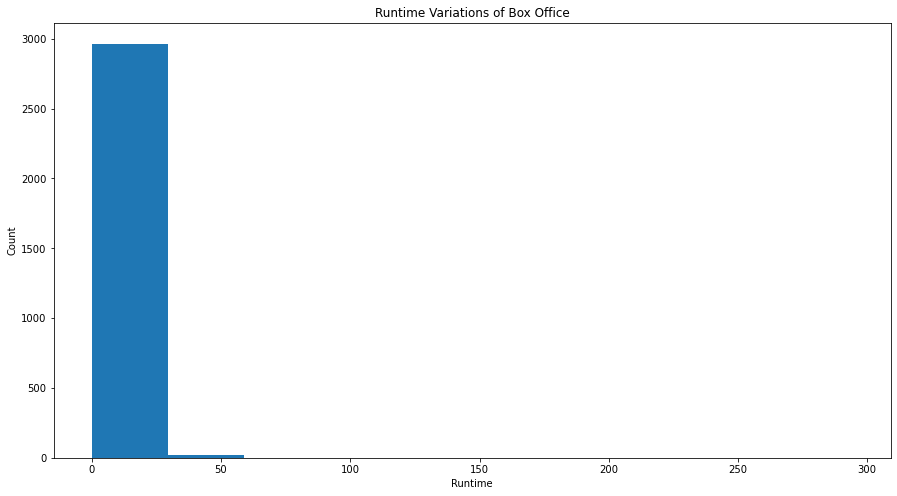

In [50]:
plt.figure(figsize = (15,8))
plt.hist(traindf["popularity"])
plt.xlabel("Runtime")
plt.ylabel("Count")
plt.title("Runtime Variations of Box Office")
plt.show()

In [51]:
traindf["popularity"].sort_values(ascending=False)

518     294.337037
684     287.253654
1695    228.032744
2326    187.860492
2126    185.330992
           ...    
773       0.001272
1503      0.000844
741       0.000578
1683      0.000308
2556      0.000001
Name: popularity, Length: 3000, dtype: float64

# EDA using Groupby

In [52]:
test= traindf[["BinBudget","BinRunTime","revenue"]]
Group= test.groupby(["BinBudget","BinRunTime"],as_index=False).mean()
print(Group)
display(Group)


       BinBudget BinRunTime       revenue
0     Low Budget      Short  4.177183e+07
1     Low Budget     Medium  7.615252e+07
2     Low Budget       Long  3.593564e+07
3  medium Budget      Short  4.478421e+08
4  medium Budget     Medium  5.922228e+08
5  medium Budget       Long           NaN
6    High Budget      Short           NaN
7    High Budget     Medium  7.820467e+08
8    High Budget       Long           NaN


,BinBudget,BinRunTime,revenue
0,Low Budget,Short,4.177183e+07
1,Low Budget,Medium,7.615252e+07
2,Low Budget,Long,3.593564e+07
3,medium Budget,Short,4.478421e+08
4,medium Budget,Medium,5.922228e+08
5,medium Budget,Long,NaN
6,High Budget,Short,NaN
7,High Budget,Medium,7.820467e+08
8,High Budget,Long,NaN


In [53]:
pivot=Group.pivot("BinBudget","BinRunTime")
display(pivot)

revenue                          
BinRunTime            Short        Medium        Long
BinBudget                                            
Low Budget     4.177183e+07  7.615252e+07  35935639.5
medium Budget  4.478421e+08  5.922228e+08         NaN
High Budget             NaN  7.820467e+08         NaN

Text(0.5, 1.0, 'heatmap of binned budget and runtime with price')

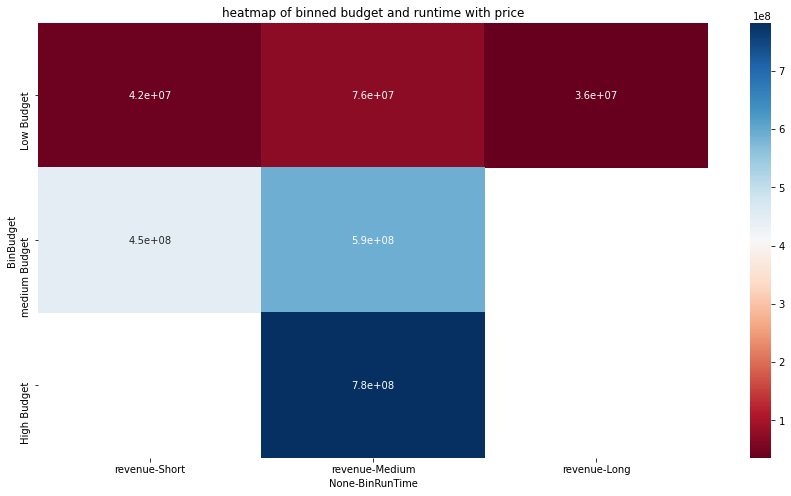

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(pivot,annot=True,cmap="RdBu")
plt.title("heatmap of binned budget and runtime with price")

Text(0, 0.5, 'Budget')

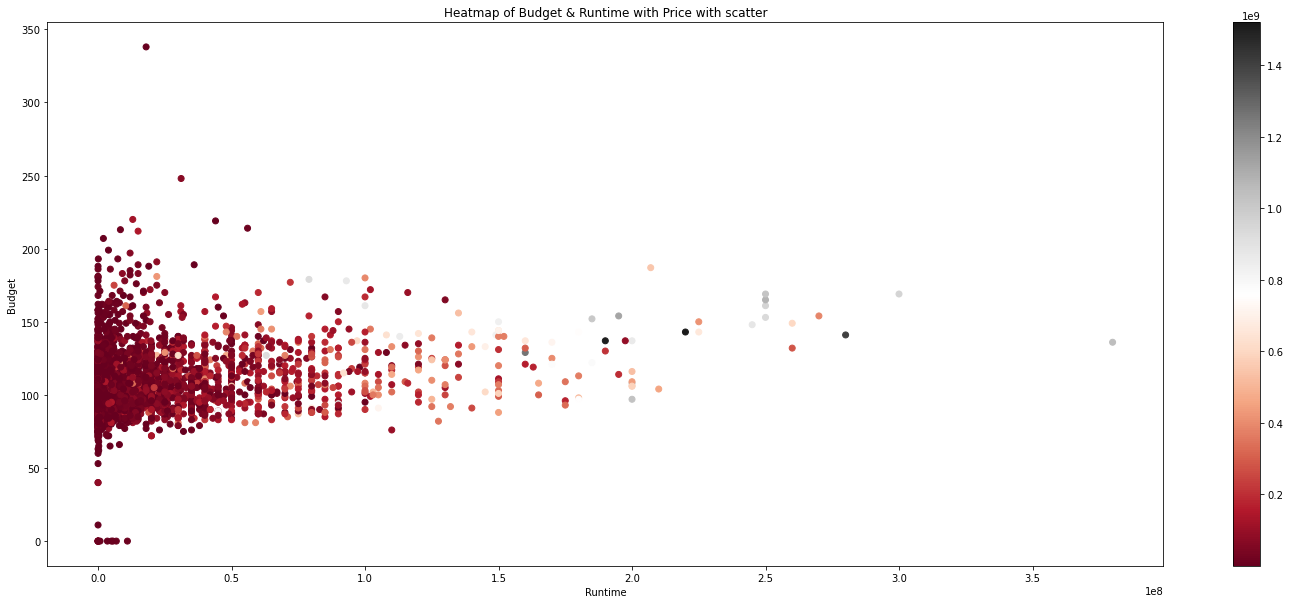

In [56]:
plt.figure(figsize = (25,10))

plt.scatter(traindf["budget"],traindf["runtime"],c=traindf["revenue"],cmap="RdGy")
plt.colorbar()
plt.title("Heatmap of Budget & Runtime with Price with scatter")
plt.xlabel("Runtime")
plt.ylabel("Budget")

# Correlation Plot

In [65]:
traindf.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.019732,-0.007470,0.010750,0.000610
budget,0.019732,1.000000,0.342356,0.238373,0.752965
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460
runtime,0.010750,0.238373,0.133690,1.000000,0.216380
revenue,0.000610,0.752965,0.461460,0.216380,1.000000


<AxesSubplot:>

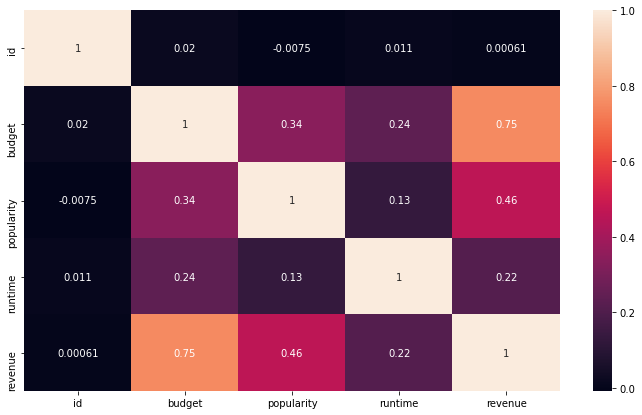

In [70]:
plt.figure(figsize=(12,7))
sns.heatmap(traindf.corr(),annot=True)

In [90]:
traindf[['release_month','release_day','release_year']]=traindf['release_date'].str.split('/',expand=True).replace(np.nan,-1).astype(int)
traindf.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,title,Keywords,cast,crew,revenue,BinBudget,BinRunTime,release_month,release_day,release_year
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Low Budget,Short,2,20,15
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Low Budget,Medium,8,6,4


<AxesSubplot:>

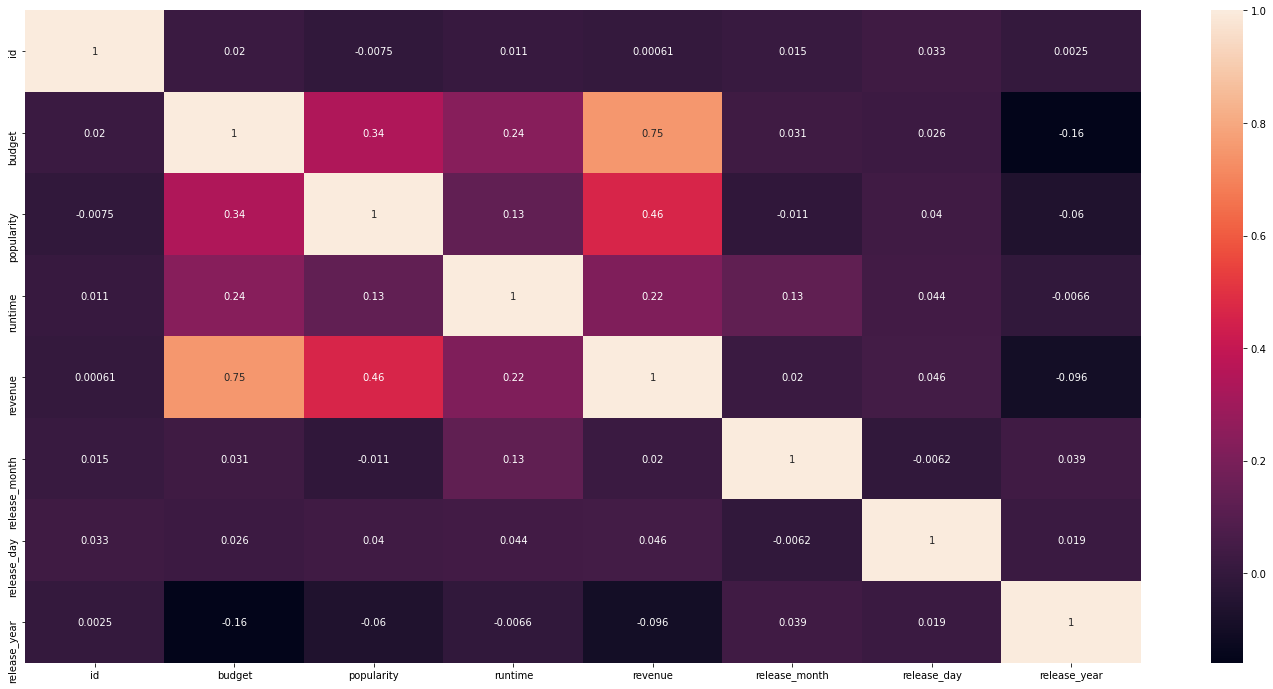

In [91]:
plt.figure(figsize = (25,12))
sns.heatmap(traindf.corr(),annot = True)

In [92]:
traindf.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,title,Keywords,cast,crew,revenue,BinBudget,BinRunTime,release_month,release_day,release_year
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Low Budget,Short,2,20,15
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Low Budget,Medium,8,6,4


C:\Users\ps2en\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


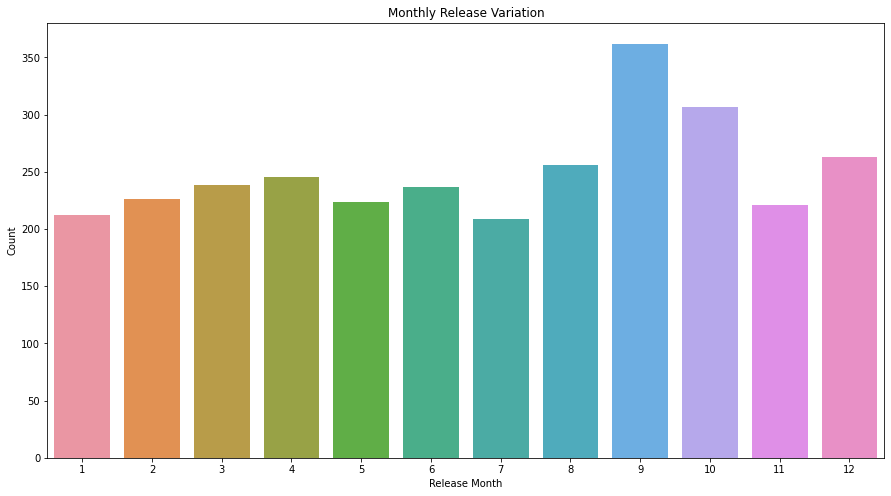

In [98]:
plt.figure(figsize = (15,8))
sns.countplot(traindf["release_month"])
plt.xlabel("Release Month")
plt.ylabel("Count")
plt.title("Monthly Release Variation")
plt.show()

In [101]:
traindf.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'BinBudget', 'BinRunTime', 'release_month', 'release_day',
       'release_year'],
      dtype='object')

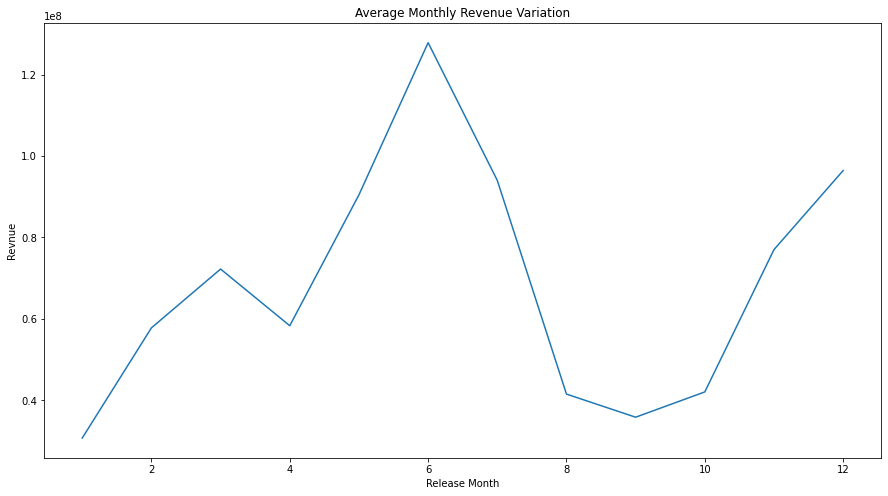

In [111]:
plt.figure(figsize=(15,8))

test3=traindf[['release_month','revenue']]
group3=test3.groupby(['release_month']).mean()
plt.plot(group3)
plt.xlabel("Release Month")
plt.ylabel("Revnue")
plt.title("Average Monthly Revenue Variation")
plt.show()




C:\Users\ps2en\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


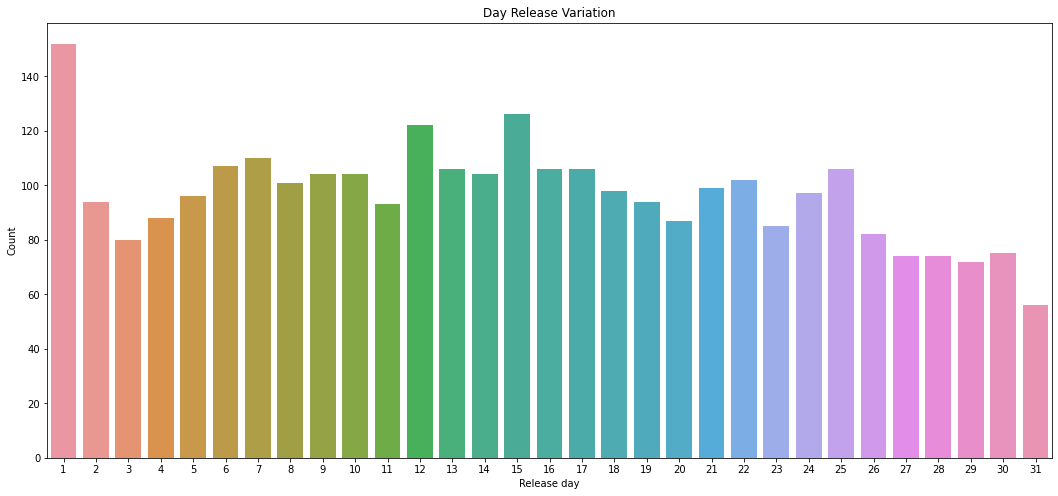

In [114]:
plt.figure(figsize=(18,8))
sns.countplot(traindf["release_day"])
plt.xlabel("Release day")
plt.ylabel("Count")
plt.title("Day Release Variation")
plt.show()

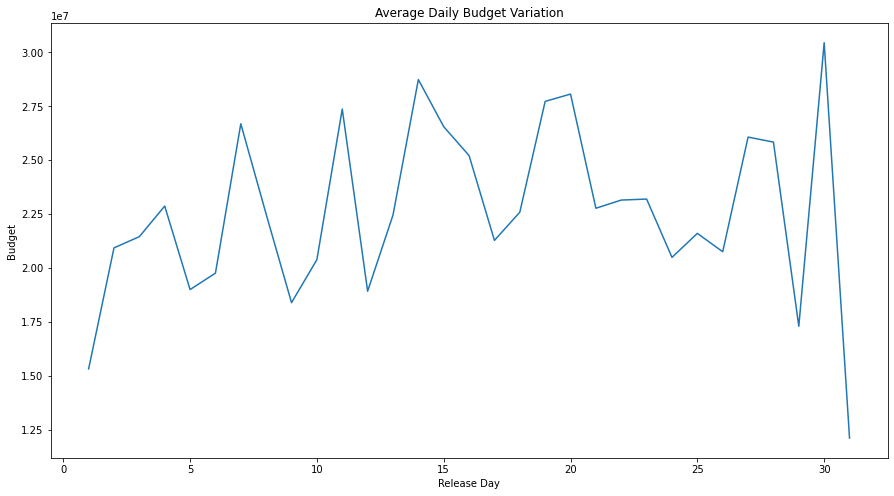

In [116]:
plt.figure(figsize = (15,8))

test4 = traindf[["release_day","budget"]]
group4=test4.groupby(["release_day"]).mean()
plt.plot(group4)
plt.xlabel("Release Day")
plt.ylabel("Budget")
plt.title("Average Daily Budget Variation")
plt.show()

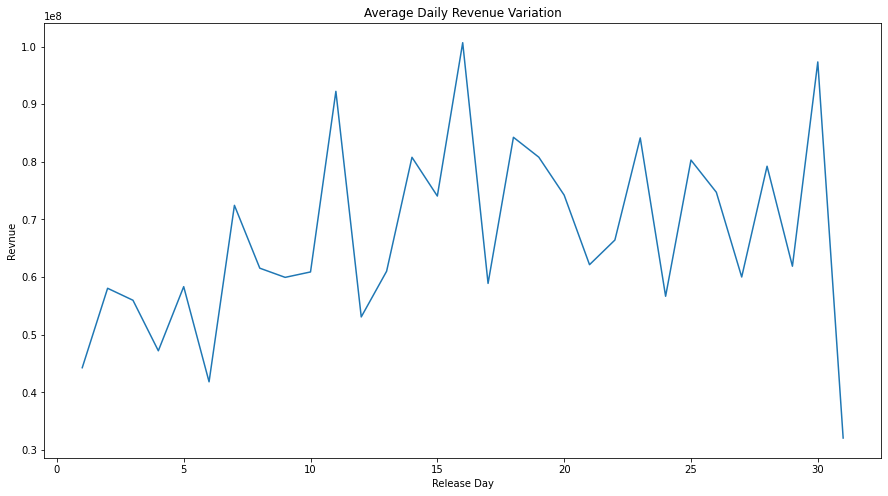

In [117]:
plt.figure(figsize = (15,8))

testdaily = traindf[["release_day","revenue"]]
groupdaily = testdaily.groupby(["release_day"]).mean()
plt.plot(groupdaily)

plt.xlabel("Release Day")
plt.ylabel("Revnue")
plt.title("Average Daily Revenue Variation")
plt.show()

C:\Users\ps2en\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


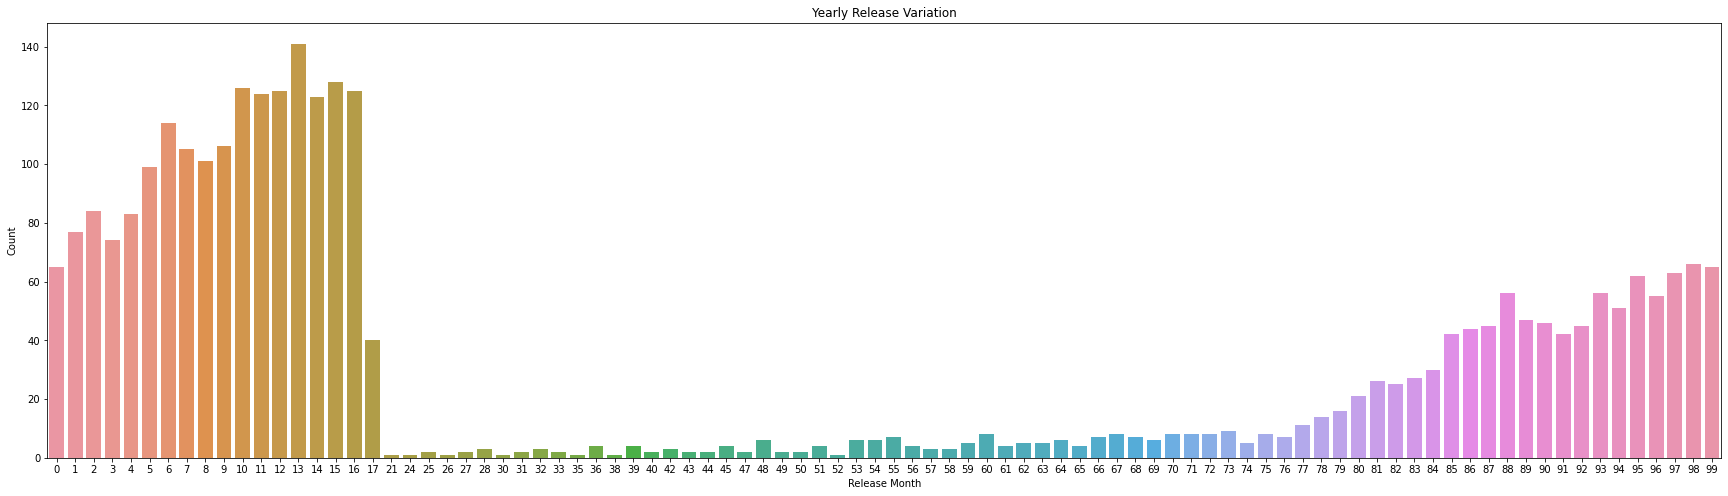

In [118]:
plt.figure(figsize = (30,8))
sns.countplot(traindf["release_year"])
plt.xlabel("Release Month")
plt.ylabel("Count")
plt.title("Yearly Release Variation")
plt.show()

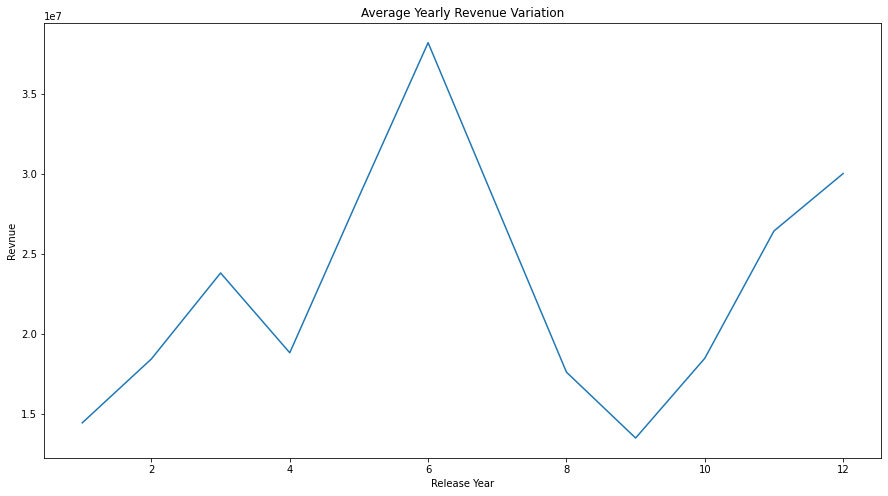

In [122]:
plt.figure(figsize = (15,8))

traindf['YearlyBudget'] = traindf[["release_month","budget"]].groupby(["release_month"]).mean()
plt.plot(traindf['YearlyBudget'])

plt.xlabel("Release Year")
plt.ylabel("Revnue")
plt.title("Average Yearly Revenue Variation")
plt.show()

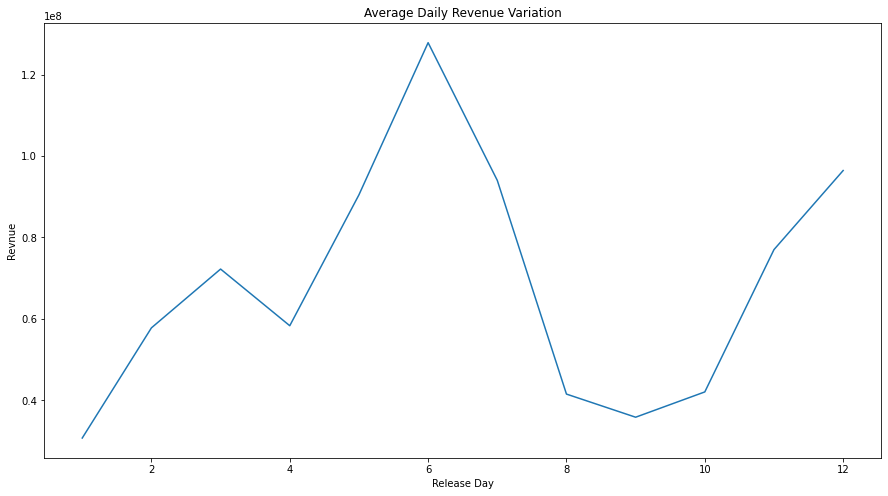

In [123]:
plt.figure(figsize = (15,8))

traindf['YearlyRevnue'] = traindf[["release_month","revenue"]].groupby(["release_month"]).mean()
plt.plot(traindf['YearlyRevnue'])

plt.xlabel("Release Day")
plt.ylabel("Revnue")
plt.title("Average Daily Revenue Variation")
plt.show()

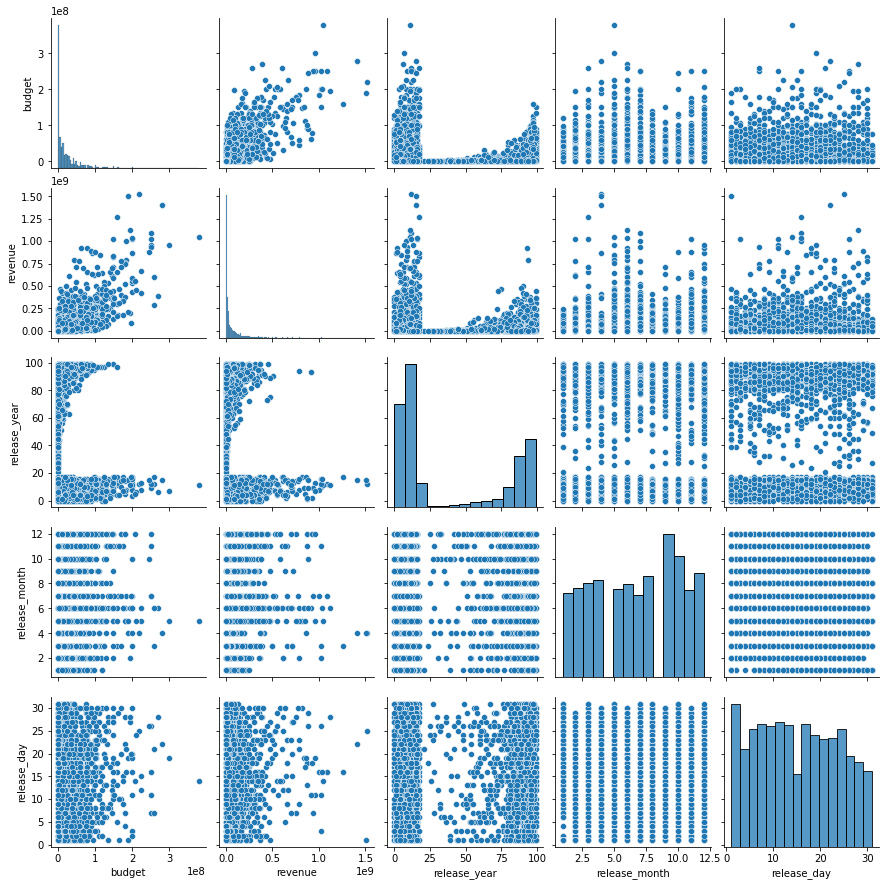

In [124]:
sns.pairplot(traindf[["budget","revenue","release_year","release_month","release_day"]])

In [127]:
traindf.head(4)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,cast,crew,revenue,BinBudget,BinRunTime,release_month,release_day,release_year,YearlyBudget,YearlyRevnue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Low Budget,Short,2,20,15,NaN,NaN
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Low Budget,Medium,8,6,4,1.444187e+07,3.070678e+07
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Low Budget,Short,10,10,14,1.843769e+07,5.778889e+07
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Low Budget,Medium,3,9,12,2.380873e+07,7.224145e+07


In [137]:
traindf.loc[pd.isnull(traindf["homepage"]) ,"Is There Homepage"] = 0
traindf["Is There Homepage"].replace(np.nan,"1",inplace=True)    # So int this NaN will be for the title that have home page

traindf.loc[pd.isnull(traindf["tagline"]) ,"Is There Tagline"] = 0
traindf["Is There Tagline"].replace(np.nan,"1",inplace=True)    # So int this NaN will be for the title that have Tagline

traindf['English Movie'] = 0 
traindf.loc[ traindf['original_language'] == "en" ,"English Movie"] = 1


In [138]:
traindf.head(4)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,BinBudget,BinRunTime,release_month,release_day,release_year,YearlyBudget,YearlyRevnue,Is There Homepage,Is There Tagline,English Movie
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Low Budget,Short,2,20,15,NaN,NaN,0,1,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Low Budget,Medium,8,6,4,1.444187e+07,3.070678e+07,0,1,1
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Low Budget,Short,10,10,14,1.843769e+07,5.778889e+07,1,1,1
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Low Budget,Medium,3,9,12,2.380873e+07,7.224145e+07,1,0,0


C:\Users\ps2en\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Is There Homepage', ylabel='count'>

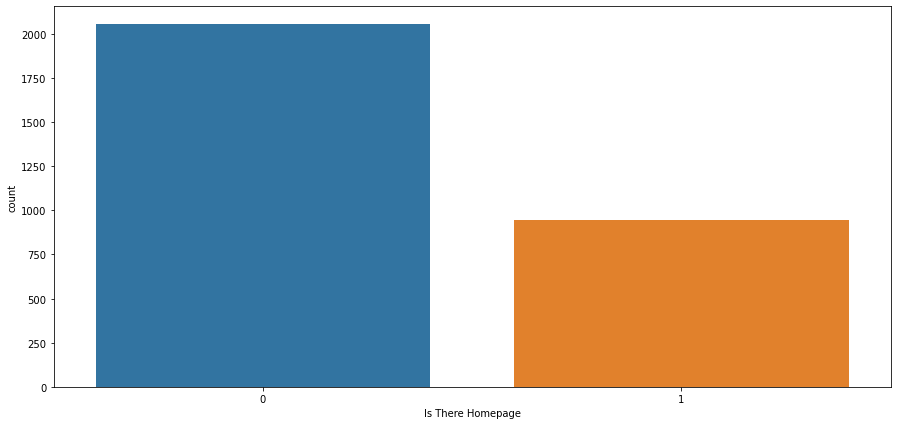

In [139]:
plt.figure(figsize = (15,7))
sns.countplot(traindf["Is There Homepage"])

C:\Users\ps2en\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


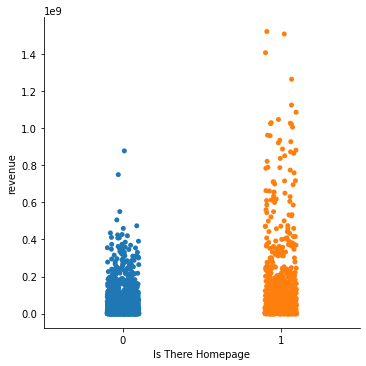

In [140]:
# plt.figure(figsize = (28,17))
sns.catplot("Is There Homepage",y="revenue",data = traindf)

C:\Users\ps2en\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2016x1224 with 0 Axes>

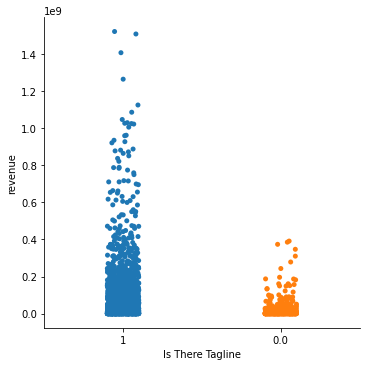

In [142]:
 plt.figure(figsize = (28,17))
sns.catplot("Is There Tagline",y="revenue",data = traindf)

In [163]:
from sklearn.linear_model import LinearRegression 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split



In [167]:
TrainingFeatures = traindf[["budget","popularity","runtime","Is There Homepage","Is There Tagline","English Movie"]]
y = traindf["revenue"]

xTrain,xTest,yTrain,yTest = train_test_split(TrainingFeatures,y,test_size = 0.10,random_state = 0)

In [168]:

TrainingFeatures.isnull().sum()

budget               0
popularity           0
runtime              0
Is There Homepage    0
Is There Tagline     0
English Movie        0
dtype: int64

Linear Regression

In [169]:
lr = LinearRegression()
lr.fit(xTrain,yTrain)
print( lr.score(xTest,yTest))

0.652903191909091


Polynomial Regression Checking the Rsquared Scores For various Degrees

In [176]:
RsqTest = []
order = np.arange(1,6,1)

for n in order:
    pr = PolynomialFeatures(degree = n )
    Scale = StandardScaler()
    xTrainTrans = pr.fit_transform(xTrain) 
    xTestTrans = pr.fit_transform(xTest)
    
    
    lr.fit(xTrainTrans,yTrain)
    RsqTest.append(lr.score(xTestTrans,yTest))
        
print(RsqTest) 

[0.6529031919090893, 0.6511261450252118, 0.6552103901820554, 0.6033760138237916, 0.5220729411955318]


(0.6, 0.7)

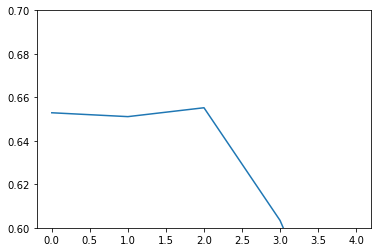

In [172]:
 plt.plot(RsqTest)
 plt.ylim(0.6,0.7)